### 1.2 Creación del modelo
se crea el modelo y las matrices para resolver el problema de optimización de la forma
$$
A\times x = b
$$

En donde, en la matriz $A$ se colocan los valores independientes (x) y una columna de unos para multiplicar la matriz de parámetros ( a encontrar) $b$. La solución del sistema se puede hallar con la pseudo inversa de Moore penrose, disponible en `numpy.linalg.pinv()`


In [2]:
import numpy as np
import matplotlib.pyplot as plt

 Se establece un conjunto de datos de precios de viviendas en función de su tamaño.  Los datos sobre el tamaño estarán dados en pies cuadrados y el precio en miles de dólares para un dataset de 200 viviendas. El objetivo será ajustar una línea recta a estos datos para predecir el precio de una vivienda según su tamaño.
 Se ajustara una línea de la forma:

Precio=𝑚⋅Tamaño+𝑐


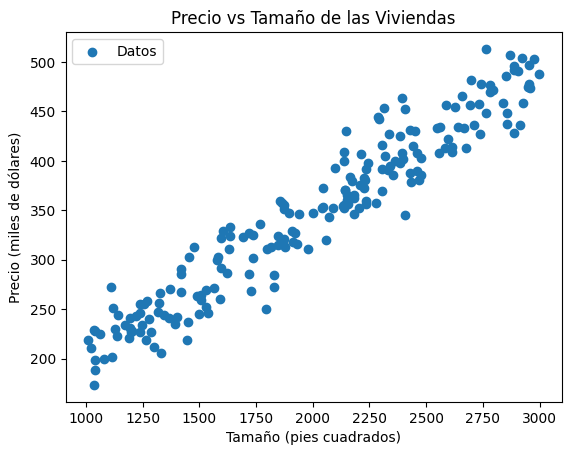

In [3]:
# Semilla para reproducibilidad
np.random.seed(0)

tamaños = np.random.uniform(1000, 3000, 200) ## 200 valores entre 1000 y 3000 pies cuadrados

precio=0.15 * tamaños + 50 + np.random.normal(0, 25, 200) #(en miles de dólares) con una relación lineal y algo de ruido

# Visualizar los datos
plt.scatter(tamaños, precio, label='Datos')
plt.xlabel('Tamaño (pies cuadrados)')
plt.ylabel('Precio (miles de dólares)')
plt.title('Precio vs Tamaño de las Viviendas')
plt.legend()
plt.show()

Los parámetros son:  [ 0.14452445 58.14909766]


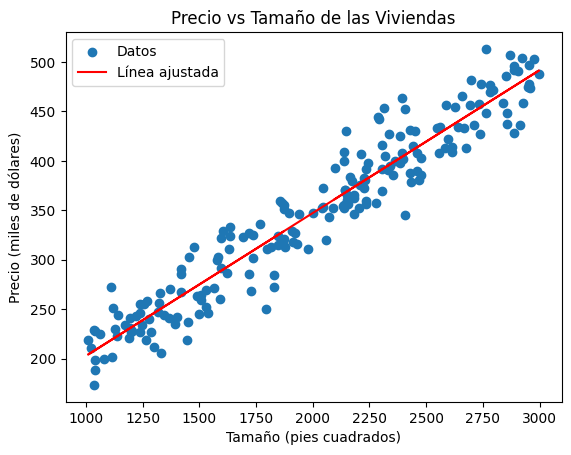

In [4]:
#Ajuste del modelo de regresion Lineal 

#matriz A
A = np.array([tamaños, np.ones(len(tamaños))]).T  #con forma (200,2)

# vector b
b = precio #forma (200,1)

# Calculo de la pseudo inversa de A
A_pinv = np.linalg.pinv(A)

# Parámetros
parametros_b = A_pinv.dot(b)  # al calcular la pseudo inversa de A y multiplicada por b, se resuelve el sistema de eccuaciones lineales Ax x =b 

# Imprimir los parámetros encontrados
print("Los parámetros son: ", parametros_b)  #serán el coeficiente de la pendiente m y el intercepto de la linea C 


# Dibujar la línea de regresión ajustada
plt.scatter(tamaños, precio, label='Datos')
plt.plot(tamaños, parametros_b[0] * tamaños+ parametros_b[1], color='red', label='Línea ajustada')
plt.xlabel('Tamaño (pies cuadrados)')
plt.ylabel('Precio (miles de dólares)')
plt.title('Precio vs Tamaño de las Viviendas')
plt.legend()
plt.show()

In [6]:
parametros_b 


array([ 0.14452445, 58.14909766])

In [7]:
parametros_b.shape

(2,)